## Arithmetic formatter problem

- Rules to follow

 - len(list) <= 5
 - item_in_list[1] == '+' 0r '-'
 - item_in_list[0] and item_in_list[2] -- str.isdigit()
 - len(item_in_list[0]) and len(item_in_list[2]) <=4

In [2]:
def higher_length(first_number, second_number):
    length_1 = len(first_number)
    length_2 = len(second_number)
    
    if length_1 > length_2:
        return length_1
    return length_2

def do_math(first, operator, second):
    if operator == '+':
        return str(int(first) + int(second))
    else:
        return str(int(first) - int(second))

def arithmetic_arranger(list_, show_answers=None):
    first_numbers = []
    second_numbers = []
    operators = []
    
    if len(list_) > 4:
        return 'Error: Too many problems.'
    else:
        for item in list_:
            elements = item.split()
            if (elements[1] != '+' and elements[1] != '-'):
                return "Error: Operator must be '+' or '-'."
            elif not (elements[0].isdigit() and elements[2].isdigit()):
                return 'Error: Numbers must only contain digits.'
            elif (len(elements[0]) > 4 or len(elements[2]) > 4):
                return 'Error: Numbers cannot be more than four digits.'
            else:
                first_numbers.append(elements[0])
                second_numbers.append(elements[2])
                operators.append(elements[1])
                
    widths = []
    for first, second in zip(first_numbers, second_numbers):
        widths.append(higher_length(first, second) + 2)  # one space and for operator
        
    first_line = []
    second_line = []
    third_line = []
    fourth_line = []
    for first, operator, second, width in zip(first_numbers, operators,second_numbers, widths):
        first_line.append(first.rjust(width))
        second_line.append(operator + second.rjust(width - 1) )
        third_line.append('-'*width)
        fourth_line.append(do_math(first, operator, second).rjust(width))
        
    if show_answers != True:
        return '    '.join(first_line) + '\n' + '    '.join(second_line) + '\n' + '    '.join(third_line)
    else:
        return '    '.join(first_line) + '\n' + '    '.join(second_line) + '\n' + '    '.join(third_line) + '\n' + \
    '    '.join(fourth_line)

In [3]:
print(arithmetic_arranger(["32 + 698", "1 - 3809", "45 + 43", "123 + 49"], True))

   32         1      45      123
+ 698    - 3809    + 43    +  49
-----    ------    ----    -----
  730     -3808      88      172


In [4]:
print(arithmetic_arranger(["3 + 855", "3801 - 2", "45 + 43", "123 + 49"], True))

    3      3801      45      123
+ 855    -    2    + 43    +  49
-----    ------    ----    -----
  858      3799      88      172


In [50]:
arithmetic_arranger(["44 + 815", "909 - 2", "45 + 43", "123 + 49", "888 + 40", "653 + 87"])

'Error: Too many problems.'

In [51]:
arithmetic_arranger(["3 + 855", "3801 - 2", "45 + 43", "123 + 49"], True)

'    3      3801      45      123\n+ 855    -    2    + 43    +  49\n-----    ------    ----    -----\n  858      3799      88      172'

## Time Calculator

In [6]:
def twelve_hour_format(total_hr, total_min):
    # hour in 12_hour format
    # total_hr and total_min in str
    total_hr = int(total_hr)
    if total_hr % 12 != 0:
        return str(total_hr % 12) + ':' + total_min
    return str(12) + ':' + total_min

def am_or_pm(total_hr):
    # Input in str
    
    total_hr = int(total_hr)
    am_pm_metric = total_hr // 12
    
    if am_pm_metric % 2 != 0:
        return 'PM'
    return 'AM'

def day_after(start_hr_min, duration_hr_min):
    # Convert start_hr_time to 4-digit GMT
    # Convert total_hr and total_min to str
    
    start_min = start_hr_min[0] * 60 + start_hr_min[1]
    duration_min = duration_hr_min[0] * 60 + duration_hr_min[1]
    gmt_min = 24 * 60
    
    if duration_min + start_min < gmt_min:
        return ''
    
    if duration_min + start_min > gmt_min:
        min_to_1day = gmt_min - start_min
        min_after_1day = duration_min - min_to_1day
        
        if min_to_1day < duration_min and min_after_1day < gmt_min:
            return '(next day)'
        else:
            num_days = min_after_1day // (24 * 60)
            return '({} days later)'.format(num_days + 1)

def weekday_determinant(start_hr_min, duration_hr_min, start_day_of_week):
    # Convert start_hr_time to 4-digit GMT
    # Convert total_hr and total_min to str
    
    start_min = start_hr_min[0] * 60 + start_hr_min[1]
    duration_min = duration_hr_min[0] * 60 + duration_hr_min[1]
    gmt_min = 24 * 60
    
    num_days = 0
    if duration_min + start_min < gmt_min:
        num_days = 0
    
    if duration_min + start_min > gmt_min:
        min_to_1day = gmt_min - start_min
        min_after_1day = duration_min - min_to_1day
        
        if min_to_1day < duration_min and min_after_1day < gmt_min:
            num_days = 1
        else:
            num_days = min_after_1day // (24 * 60)  + 1 
    

    weekday_string = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
    
    # lets label Monday-Sunday 1-7
    
    start_day_label = weekday_string.index(start_day_of_week.upper()) + 1
    # Add start_day labels to num_days
    
    day_determinant = num_days + start_day_label
    
    if day_determinant < 7:
        return weekday_string[day_determinant - 1].capitalize()
    elif day_determinant > 7:
        return weekday_string[(day_determinant % 7) - 1].capitalize()
    else:
        return weekday_string[6].capitalize()
    
def add_time(start_time, duration_time, start_day_of_week=None):
    
    if 'AM' in start_time:
        start_hr_min = [int(i) for i in start_time.split(' ')[0].split(':')]
        duration_hr_min = [int(i) for i in duration_time.split(':')]
        
        # Add both to get answer in GMT
        total_hr = str((duration_hr_min[0] + start_hr_min[0]) + ((duration_hr_min[1] + start_hr_min[1]) // 60))
        total_min = str((duration_hr_min[1] + start_hr_min[1]) % 60)
        
        
        # Length of min portion
        if len(str(total_min)) == 1: # Add 0 before it
            total_min = '0' + str(total_min)
        
        if start_day_of_week:
            return (twelve_hour_format(total_hr, total_min) + ' ' + am_or_pm(total_hr) +  ', ' + \
                weekday_determinant(start_hr_min, duration_hr_min, start_day_of_week) + ' '+ \
        day_after(start_hr_min, duration_hr_min)).rstrip()
    
        
        return (twelve_hour_format(total_hr, total_min) + ' ' + am_or_pm(total_hr) +  ' ' + \
                day_after(start_hr_min, duration_hr_min)).rstrip()

    if 'PM' in start_time:
        
        # Convert PM to GMT
        start_hr_min = [int(i) for i in start_time.split(' ')[0].split(':')]
        duration_hr_min = [int(i) for i in duration_time.split(':')]
        
        # Add both to get answer in GMT
        # In particular add 12 to hour component in start_hr_min, to convert to GMT
        start_hr_min = [start_hr_min[0] + 12, start_hr_min[1]]
        total_hr = str((duration_hr_min[0] + start_hr_min[0]) + ((duration_hr_min[1] + start_hr_min[1]) // 60))
        total_min = str((duration_hr_min[1] + start_hr_min[1]) % 60)
        
        
        # Length of min portion
        if len(str(total_min)) == 1: # Add 0 before it
            total_min = '0' + str(total_min)
        
        if start_day_of_week:
            return (twelve_hour_format(total_hr, total_min) + ' ' + am_or_pm(total_hr) +  ', ' + \
                weekday_determinant(start_hr_min, duration_hr_min, start_day_of_week) + ' '+ \
        day_after(start_hr_min, duration_hr_min)).rstrip()
    
        
        return (twelve_hour_format(total_hr, total_min) + ' ' + am_or_pm(total_hr) +  ' ' + \
                day_after(start_hr_min, duration_hr_min)
).rstrip()

In [7]:
add_time("11:55 AM", "3:02")

'2:57 PM'

In [8]:
add_time("6:30 PM", "205:12")

'7:42 AM (9 days later)'

In [10]:
add_time("11:43 PM", "24:20", "friday")

'12:03 AM, Sunday (2 days later)'

## Budget App

#### Instantiate category class objects based on:
- food, clothing, and entertainment
-  Class should have an instance variable **ledger** that is a list
- __deposit method__ accepts amount and description. If no description then default to empty string. The method should append object to the ledger list in the form of {"amount": amount, "description": description}.
- __withdraw method__ is similar to deposit method. Except that amount passed is stored in ledger as negative number. If no enough funds nothing should be added to ledger. Method should True if withdrawal took place. False otherwise
- __get_balance__ method that returns current balance based on deposits and withdrawals that have occured
- __transfer__ method accepts amount and another budget category as arguments 
    - The method should add a withdrawal with the amount and the description "Transfer to [Destination Budget Category]". 
    -  The method should then add a deposit to the other budget category with the amount and the description "Transfer from             [Source Budget Category]".
    - If there are not enough funds, nothing should be added to either ledgers. This method should return True if the transfer took place, and False otherwise.
- __check_funds__ method accepts amount as argument
    - if amount > balance of budget category return False otherwise return True
    - This method should be used by both withdraw and transfer method
    
When the budget object is displayed, it should display
- A title line with 30 * characters with __name of category centred__
- A list of items. Each line should show description and amount. First 23 characters should be displayed then the amount. The amount should be right-aligned contain 2 d.p and display a maximum of 7 characters
- A line displaying the category total

#### Write a function called create_spend_chart
- This takes a list of categories and returns a string that is a barchart
- The chart should show % spent in each category(as passed into the function)
- % spent in each category should be computed based on withdrawals and not deposits
- Down the left side should be labels 0-100. The bars in ten barchat should be made out of "o" character. 
- The height of each bar should be rounded down to the nearest 10
- The horizontal bar should go two spaces past the final bar below( @ the bottom)
- Each category name should be vertically positioned below each 
- There should be a title at the top that says "Percentage spent by category".
- Thne function will be tested to up to four categories

**Output of the class**
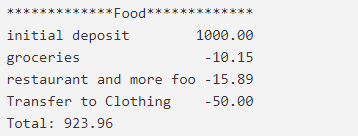

**Output of the function**
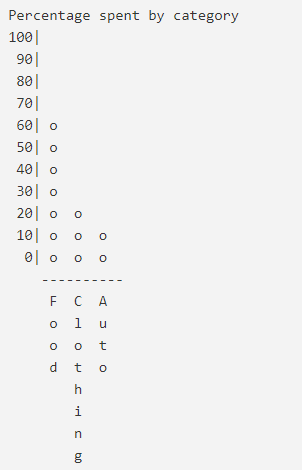

In [37]:
class Category:

    
    def __init__(self, category_name):
        
        self.category_name = category_name
        self.ledger = []
        
    def deposit(self, amount, description=""):
        
        self.deposit_container = dict()
        self.deposit_container['amount'] = amount
        self.deposit_container['description'] = description
        
        self.ledger.append(self.deposit_container)
    
    def withdraw(self, amount, description=""):
        
        amount_less_than_balance = self.check_funds(amount)
        if amount_less_than_balance:
            self.withdrawal_container = dict()
            self.withdrawal_container['amount'] = - amount
            self.withdrawal_container['description'] = description
            
            self.ledger.append(self.withdrawal_container)
            return True

        return False
            
    def get_balance(self):
        balance = 0
        
        for each_item in self.ledger:
            balance += each_item.get('amount')
            
        return balance
    
    def transfer(self, amount, other_category):
        
        add_withdrawal = self.withdraw(amount, "Transfer to {}".format(other_category.category_name))
        add_deposit = other_category.deposit(amount, "Transfer from {}".format(self.category_name))
        
        if add_withdrawal:
            return True
        return False
    
    def check_funds(self, amount):
        if amount > self.get_balance(): # True if amount < balance
            return False
        return True
    
    def get_withdrawals(self):
        total_withdrawal = 0
        for item in self.ledger:
            if item.get("amount") < 0:
                total_withdrawal += item.get("amount")
        return total_withdrawal
    
    def __str__(self):
        output = []
        first_line = "{:*^30}".format(self.category_name)
        output.append(first_line)
        
        for item in self.ledger:
            output.append("{:<23}{:>7.2f}".format(item.get('description')[:23], item.get('amount')))
        
        # Add total: balance to output
        output.append("Total: {:.2f}".format(self.get_balance()))
        
        return '\n'.join(output)

In [38]:
food = Category("Food")
food.deposit(1000, "initial deposit")
food.withdraw(10.15, "groceries")
food.withdraw(15.89, "restaurant and more food for dessert")
print(food.get_balance())
clothing = Category("Clothing")
food.transfer(50, clothing)
clothing.withdraw(25.55)
clothing.withdraw(100)
auto = Category("Auto")
auto.deposit(1000, "initial deposit")
auto.withdraw(15)

print(food)
print(clothing)

973.96
*************Food*************
initial deposit        1000.00
groceries               -10.15
restaurant and more foo -15.89
Transfer to Clothing    -50.00
Total: 923.96
***********Clothing***********
Transfer from Food       50.00
                        -25.55
Total: 24.45


In [47]:

def get_total_withdrawal(categories):
    total = 0
    withdrawal_per_category = []
    for category in categories:
        total += category.get_withdrawals()
        withdrawal_per_category.append(category.get_withdrawals())
    
    # Round to the nearest 10
    withdrawal_per_category = [round((i /total)* 100) for i in withdrawal_per_category]
    
    return withdrawal_per_category

def create_spend_chart(categories):
    output = "Percentage spent by category\n"
    i = 100
    percent_of_total = get_total_withdrawal(categories)
    for i in range(100, -10, -10):
        cat_spaces = " "
        for percent in percent_of_total:
            if percent >= i:
                cat_spaces += "o  "

            else:
                cat_spaces += "   "
        output += str(i).rjust(3) + "|" + cat_spaces + ("\n")
        i-=10
    
    dashes = "-" + "---"*len(categories)
    names = []
    x_axis = ""
    for category in categories:
        names.append(category.category_name)

    maxi = max(names, key=len)

    for x in range(len(maxi)):
        nameStr = '     '
        for name in names:
            if x >= len(name):
                nameStr += "   "
            else:
                nameStr += name[x] + "  "
        nameStr += '\n'
        x_axis += nameStr

    output += dashes.rjust(len(dashes)+4) + "\n" + x_axis
    return output.rstrip('\n')

In [48]:
print(create_spend_chart([food, clothing, auto]))

Percentage spent by category
100|          
 90|          
 80|          
 70|          
 60| o        
 50| o        
 40| o        
 30| o        
 20| o  o     
 10| o  o  o  
  0| o  o  o  
    ----------
     F  C  A  
     o  l  u  
     o  o  t  
     d  t  o  
        h     
        i     
        n     
        g     


In [26]:
create_spend_chart([food, clothing, auto])

'Percentage spent by category\n100|          \n 90|          \n 80|          \n 70|          \n 60| o        \n 50| o        \n 40| o        \n 30| o        \n 20| o  o     \n 10| o  o  o  \n  0| o  o  o  \n    ----------\n     F  C  A  \n     o  l  u  \n     o  o  t  \n     d  t  o  \n        h     \n        i     \n        n     \n        g     '

## POLYGON AREA CALCULATOR

##### Create rectangle class
- set_width
- set_height
- get_area: Returns area (width * height)
- get_perimeter: Returns perimeter (2 * width + 2 * height)
- get_diagonal: Returns diagonal ((width ** 2 + height ** 2) ** .5)
- get_picture: Returns a string with lines with "*". height = number of lines; width = length of "*" along the line. IF either width/ length > 50. Return "Too big for picture."
- get_amount_inside: Takes another shape as argument. Returns the number of times. the passed-in shape can fit inside the shape
- __str__ : Rectangle(width=5, height=10)

##### Create square class
- This should be a subclass of Rectangle class
- the __init__ should store teh side length in both **width** and  **height** 
- Square class should access REctangle class methods. Should also contain **set_side** method
- If represented as string, It should look like Square(side=9)
- Additionally, the set_width and set_height methods on the Square class should set both the width and height.

In [23]:
class Rectangle:
    
    def __init__(self, width, height):
        self.width = width
        self.height = height
        
    def set_width(self, width):
        self.width = width
        
    def set_height(self, height):
        self.height = height
        
    def get_area(self):
        return self.width * self.height
    
    def get_perimeter(self):
        return 2 * (self.width + self.height)
    
    def get_diagonal(self):
        return (self.width**2 + self.height**2) ** 0.5
    
    def get_picture(self):
        if self.width > 50 or self.height > 50:
            return "Too big for picture."
        return "\n".join(["*"* self.width for i in range(self.height)]) + "\n"
    
    def get_amount_inside(self, other_shape):
        return self.get_area() // other_shape.get_area()
    
    def __repr__(self):
        return "Rectangle(width={}, height={})".format(self.width, self.height)

In [24]:
class Square(Rectangle):
    
    def __init__(self, side):
        super().__init__(side, side)
        
    def set_side(self, side):
        Rectangle.set_width(self, side)
        Rectangle.set_height(self, side)
        
    def __repr__(self):
        return "Square(side={})".format(self.width)
    
#     def set_width(self, side):
#         self.side = side

In [25]:
rect = Rectangle(10, 5)
print(rect.get_area())
rect.set_height(3)
print(rect.get_perimeter())
print(rect)
rect.get_picture()

50
26
Rectangle(width=10, height=3)


'**********\n**********\n**********\n'

In [22]:
sq = Square(9)
print(sq.get_area())
sq.set_side(4)
print(sq.get_diagonal())
print(sq)
print(sq.get_picture())
 
rect.set_height(8)
rect.set_width(16)
print(rect.get_amount_inside(sq))

81
5.656854249492381
Square(side=4)
****
****
****
****

8.0


## PROBABILITY CALCULATOR
- Create the approximate probability of drawing certain amount of balls from arbitrary numbers of balls
To achieve this
- Start by creating a class Hat
- create **content** instance variable. if passed arguments is {"red": 2, "blue": 1}, contents should be ["red", "red","blue"].
- Create a __draw__ method in the hat. This removes balls at random from contents and return them as list of strings. The draw method is created without replacement. If number_of_balls to be drawn > available quantity. Return all the balls 

- Create a function __experiment__ with the following arguments:
    - Hat object
    - expected_balls is {"blue":2, "red":1}
    - num_balls_drawn per experiment
    - num_experiments


In [191]:
import random
import numpy as np

In [193]:
# class Hat:
    
#     def __init__(self, **kwargs):
#         self.contents = []
#         for key, value in kwargs.items():
#             for i in range(value):
#                 self.contents.append(key)
        
#     def draw(self, num_balls_drawn):
#         drawn_balls = []
#         if num_balls_drawn < len(self.contents):
#             drawn_balls = np.random.choice(np.array(self.contents), 5, replace=False)
# #                 drawn_balls.append(self.contents[rand_index])
# #                 contents_index.remove(rand_index)
# #                self.contents.remove(self.contents[rand_index])
            
    
#         for i in drawn_balls:
#             self.contents.remove(i)
        
        
        
        
        
        
#             return drawn_balls
#         return self.contents

In [196]:
# def experiment(hat, expected_balls, num_balls_drawn, num_experiments):
#     count = 0
#     for experiment in range(num_experiments):
#         yes_no = []
#         balls_drawn = list(hat.draw(num_balls_drawn))
#         for key in expected_balls:
#             yes_no.append(balls_drawn.count(key) >= expected_balls.get(key))
            
#         if all(yes_no):   # IF counts of balls > expected_num_of_balls, add 1 to cou
#             count += 1
            
#     return count/num_experiments

In [197]:
hat = Hat(black=6, red=4, green=3)
probability = experiment(hat=hat, 
                  expected_balls={"red":2,"green":1},
                  num_balls_drawn=5,
                  num_experiments=2000)

In [198]:
hat = Hat(red=5,blue=2)
print(hat.draw(2))
print(len(hat.contents))

['blue' 'red' 'red' 'red' 'red']
6


In [199]:
hat = Hat(blue=3,red=2,green=6)
prob = experiment(hat=hat, expected_balls= {"blue":2,"green":1}, num_balls_drawn=4, num_experiments=1000)
print(prob)
print(0.272)

0.0
0.272


In [200]:
hat = Hat(yellow=5,red=1,green=3,blue=9,test=1)
prob = experiment(hat=hat, expected_balls={"yellow":2,"blue":3,"test":1}, num_balls_drawn=20, num_experiments=100)
print(prob)
print(1)

1.0
1


In [78]:
random.getstate?

In [107]:
import random
random.seed('?')

In [122]:
class Hat:
    
    def __init__(self, **kwargs):
        self.contents = []
        for key, value in kwargs.items():
            for i in range(value):
                self.contents.append(key)
        
#         self.drawn_balls = []
        
    def draw(self, num_balls_drawn):
        
        drawn_balls = []
        contents_index = list(range(len(self.contents))) # Necessary for without replacement
        rand_index_list = []
        
        if num_balls_drawn < len(self.contents):
            for ball in range(num_balls_drawn):
                rand_index = random.choice(contents_index)
                drawn_balls.append(self.contents[rand_index])
                contents_index.remove(rand_index)
                rand_index_list.append(rand_index)

            for index in rand_index_list:
                del self.contents[index]
                self.contents.insert(index, 0)
            
            for count in range(self.contents.count(0)):
                self.contents.remove(0)

#             count = 0
#             for index in rand_index_list:
#                 if count > 1:
#                     del self.contents[index - count]
#                 del self.contents[index]
#                 count += 1

#             self.contents = pd.DataFrame(self.contents).iloc[~np.array(rand_index_list)][0].values.tolist()
            return drawn_balls
        
        return self.contents
        

def experiment(hat, expected_balls, num_balls_drawn, num_experiments):
    count = 0
    for experiment in range(num_experiments):
        hat_copy = copy.deepcopy(hat)
        yes_no = []
        balls_drawn = hat_copy.draw(num_balls_drawn)
        for key in expected_balls:
            yes_no.append(balls_drawn.count(key) >= expected_balls.get(key))
            
        if all(yes_no):   # IF counts of balls > expected_num_of_balls, add 1 to cou
            count += 1
            
    return count/num_experiments
# 

In [123]:
hat = Hat(red=5,blue=2)
print(hat.draw(2))
print(len(hat.contents))

['red', 'blue']
5


In [124]:
hat = Hat(blue=3,red=2,green=6)
hat.draw(4)
prob = experiment(hat=hat, expected_balls={"blue":2,"green":1}, num_balls_drawn=4, num_experiments=1000)
print(prob)
print(0.272)

0.235
0.272


In [125]:
hat = Hat(yellow=5,red=1,green=3,blue=9,test=1)
prob = experiment(hat=hat, expected_balls={"yellow":2,"blue":3,"test":1}, num_balls_drawn=20, num_experiments=100)
print(prob)
print(1)

1.0
1


In [53]:
import pandas as pd
import numpy as np

In [70]:
# class Hat:
    
#     def __init__(self, **kwargs):
#         self.contents = []
#         for key, value in kwargs.items():
#             for i in range(value):
#                 self.contents.append(key)
                
#     def draw(self, num_balls_drawn):
        
#         rand_index = np.random.choice(np.array(range(len(self.contents))), num_balls_drawn, replace=False)
#         self.contents = pd.DataFrame(self.contents)
#         drawn_balls = self.contents.iloc[rand_index][0].values.tolist()
#         self.contents = self.contents.iloc[~rand_index][0].values.tolist()
                
#         return drawn_balls

# def experiment(hat, expected_balls, num_balls_drawn, num_experiments):
#     count = 0
#     for experiment in range(num_experiments):
#         yes_no = []
#         balls_drawn = hat.draw(num_balls_drawn)
#         for key in expected_balls:
#             yes_no.append(balls_drawn.count(key) >= expected_balls.get(key))
            
#         if all(yes_no):   # IF counts of balls > expected_num_of_balls, add 1 to cou
#             count += 1
            
#     return count/num_experiments

In [118]:
import copy
import random

In [119]:
class Hat:
    
    def __init__(self, **kwargs):
        self.contents = []
        for key, value in kwargs.items():
            for i in range(value):
                self.contents.append(key)
        
        
    def draw(self, num_balls_drawn):
        
        drawn_balls = []
        
        if num_balls_drawn <= len(self.contents):
            for ball in range(num_balls_drawn):
                rand_ball_picked = random.choice(self.contents)
                drawn_balls.append(rand_ball_picked)
                self.contents.pop(self.contents.index(rand_ball_picked))
                
            return drawn_balls
        
        return self.contents
        

def experiment(hat, expected_balls, num_balls_drawn, num_experiments):
    count = 0
    for experiment in range(num_experiments):
        hat_copy = copy.deepcopy(hat)
        yes_no = []
        balls_drawn = hat_copy.draw(num_balls_drawn)
        for key in expected_balls:
            yes_no.append(balls_drawn.count(key) >= expected_balls.get(key))
            
        if all(yes_no):   # IF counts of balls > expected_num_of_balls, add 1 to cou
            count += 1
            
    return count/num_experiments

In [102]:
lis = [1, 2]

In [103]:
lis.index?